In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## ANÁLISIS EXPLORATORIO

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [9]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7      150             78             29      126  35.2   
118            4       97             60             23        0  28.2   
247            0      165             90             33      680  52.3   
157            1      109             56             21      135  25.2   
468            8      120              0              0        0  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
603                     0.692   54        1  
118                     0.443   22        0  
247                     0.427   23        0  
157                     0.833   23        0  
468                     0.183   38        1  
..                        ...  ...      ...  
763                     0.171   63        0  
192                     0.383   36        1  
629                     0.148   21        0  
559                     0.300   35        0  
684                     0.640   69        0  

[614 rows x 9 columns]

In [10]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
476            2      105             80             45      191  33.7   
482            4       85             58             22       49  27.8   
230            4      142             86              0        0  44.0   
527            3      116             74             15      105  26.3   
380            1      107             72             30       82  30.8   

     DiabetesPedigreeFunction  Age  Outcome  
661                     1.394   22        1  
122                     0.404   23        0  
113                     0.391   25        0  
14                      0.587   51        1  
529                     0.660   31        0  
..                        ...  ...      ...  
476                     0.711   29        1  
482                     0.306   28        0  
230                     0.645   22        1  
527                     0.107   24        0  
380                     0.821   24        0  

[154 rows x 9 columns]

In [11]:

# predictor = TabularPredictor(label="Outcome", problem_type='multiclass', eval_metric='accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")
predictor = TabularPredictor(label="Outcome", problem_type = 'multiclass', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221007_062010/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20221007_062010/"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Darwin
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Train Data Class Count: 2
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5384.83 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	St

: 

: 

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.789902       0.102651  44.188993                0.004247           0.882277            2       True         10
1   NeuralNetFastAI_BAG_L1   0.788274       0.092978  43.300060                0.092978          43.300060            1       True          8
2          CatBoost_BAG_L1   0.781759       0.055854  11.829219                0.055854          11.829219            1       True          5
3    NeuralNetTorch_BAG_L1   0.763844       0.058757  34.585309                0.058757          34.585309            1       True          9
4  RandomForestEntr_BAG_L1   0.755700       0.799795   1.457274                0.799795           1.457274            1       True          4
5  RandomForestGini_BAG_L1   0.749186       0.560804   2.016410                0.56080

/Users/srue/Library/Python/3.8/lib/python/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'RandomForestGini_BAG_L1': 0.749185667752443,
  'RandomForestEntr_BAG_L1': 0.755700325732899,
  'CatBoost_BAG_L1': 0.7817589576547231,
  'ExtraTreesGini_BAG_L1': 0.744299674267101,
  'ExtraTreesEntr_BAG_L1': 0.747557003257329,
  'NeuralNetFastAI_BAG_L1': 0.7882736156351792,
  'NeuralNetTorch

## Rendimiento de los modelos entrenados

In [ ]:
predictor.leaderboard()

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.789902       0.102651  44.188993                0.004247           0.882277            2       True         10
1   NeuralNetFastAI_BAG_L1   0.788274       0.092978  43.300060                0.092978          43.300060            1       True          8
2          CatBoost_BAG_L1   0.781759       0.055854  11.829219                0.055854          11.829219            1       True          5
3    NeuralNetTorch_BAG_L1   0.763844       0.058757  34.585309                0.058757          34.585309            1       True          9
4  RandomForestEntr_BAG_L1   0.755700       0.799795   1.457274                0.799795           1.457274            1       True          4
5  RandomForestGini_BAG_L1   0.749186       0.560804   2.016410                0.560804           2.016410            1       True          3
6    E

model  score_val  pred_time_val   fit_time  \
0      WeightedEnsemble_L2   0.789902       0.102651  44.188993   
1   NeuralNetFastAI_BAG_L1   0.788274       0.092978  43.300060   
2          CatBoost_BAG_L1   0.781759       0.055854  11.829219   
3    NeuralNetTorch_BAG_L1   0.763844       0.058757  34.585309   
4  RandomForestEntr_BAG_L1   0.755700       0.799795   1.457274   
5  RandomForestGini_BAG_L1   0.749186       0.560804   2.016410   
6    ExtraTreesEntr_BAG_L1   0.747557       0.519814   0.928463   
7    ExtraTreesGini_BAG_L1   0.744300       0.653654   1.061223   
8    KNeighborsUnif_BAG_L1   0.700326       0.015752   0.029713   
9    KNeighborsDist_BAG_L1   0.697068       0.005426   0.006656   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.004247           0.882277            2       True   
1                0.092978          43.300060            1       True   
2                0.055854          11.829219            1       True   
3                0.058757          34.585309            1       True   
4                0.799795           1.457274            1       True   
5                0.560804           2.016410            1       True   
6                0.519814           0.928463            1       True   
7                0.653654           1.061223            1       True   
8                0.015752           0.029713            1       True   
9                0.005426           0.006656            1       True   

   fit_order  
0         10  
1          8  
2          5  
3          9  
4          4  
5          3  
6          7  
7          6  
8          1  
9          2

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.789902       0.102651  44.188993                0.004247           0.882277            2       True         10
1   NeuralNetFastAI_BAG_L1   0.788274       0.092978  43.300060                0.092978          43.300060            1       True          8
2          CatBoost_BAG_L1   0.781759       0.055854  11.829219                0.055854          11.829219            1       True          5
3    NeuralNetTorch_BAG_L1   0.763844       0.058757  34.585309                0.058757          34.585309            1       True          9
4  RandomForestEntr_BAG_L1   0.755700       0.799795   1.457274                0.799795           1.457274            1       True          4
5  RandomForestGini_BAG_L1   0.749186       0.560804   2.016410                0.560804           2.016410            1       True          3
6    E

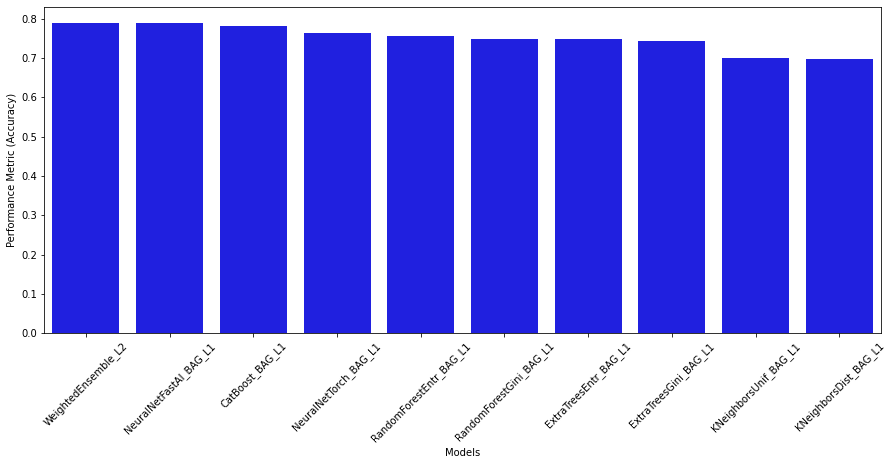

In [ ]:
# Inicializar la figura de matplotlib

f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

Evaluation: accuracy on test data: 0.8311688311688312
Evaluations on test data:
{
    "accuracy": 0.8311688311688312,
    "balanced_accuracy": 0.7890236627560151,
    "mcc": 0.5933466528277093
}


{'accuracy': 0.8311688311688312,
 'balanced_accuracy': 0.7890236627560151,
 'mcc': 0.5933466528277093}

In [ ]:
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [1, 0, 0, 1, 0]


In [ ]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
476            2      105             80             45      191  33.7   
482            4       85             58             22       49  27.8   
230            4      142             86              0        0  44.0   
527            3      116             74             15      105  26.3   
380            1      107             72             30       82  30.8   

     DiabetesPedigreeFunction  Age  Outcome  
661                     1.394   22        1  
122                     0.404   23        0  
113                     0.391   25        0  
14                      0.587   51        1  
529                     0.660   31        0  
..                        ...  ...      ...  
476                     0.711   29        1  
482                     0.306   28        0  
230                     0.645   22        1  
527                     0.107   24        0  
380                     0.821   24        0  

[154 rows x 9 columns]

In [ ]:
y_test = X_test['Outcome']
y_test # valores correctos

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

Text(0.5, 0, 'Valores reales')

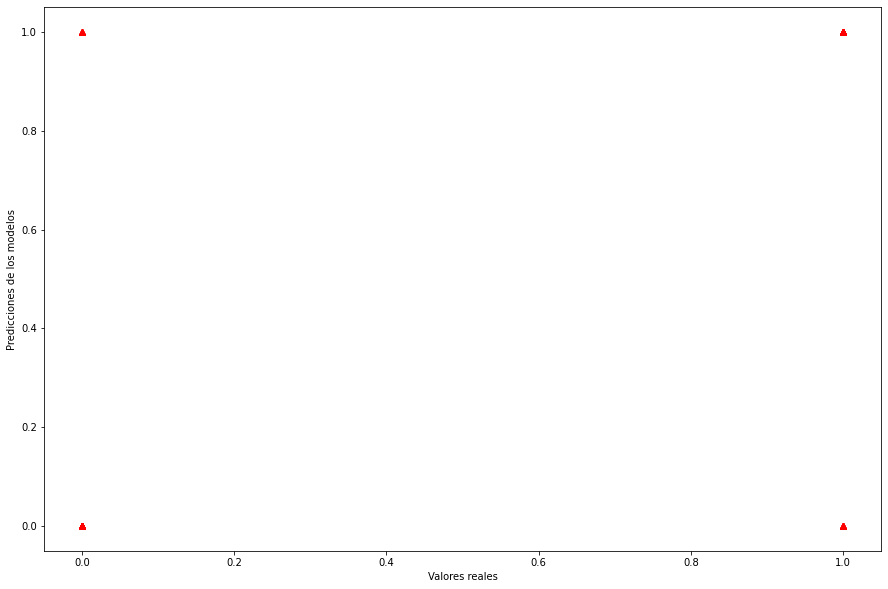

In [ ]:
y_predicc = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predicc, "^", color = 'r')
plt.ylabel('Predicciones de los modelos')
plt.xlabel('Valores reales')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predicc)),'.3f'))
MSE = mean_squared_error(y_test, y_predicc)
MAE = mean_absolute_error(y_test, y_predicc)
r2 = r2_score(y_test, y_predicc)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.411 
MSE = 0.16883116883116883 
MAE = 0.16883116883116883 
R2 = 0.20381785643269046
